# Structured EDA capstone project

Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the automobile dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sci

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the movies dataset
automobiles_df = pd.read_csv('automobile.txt')

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['normalized-losses', 'symboling']` from the data set as they will not be used in the analysis.

In [ ]:
# Check the shape of the original data
print(
    f"The original data has {automobiles_df.shape[0]} rows and "
    f"{automobiles_df.shape[1]} columns."
)

# Display the columns
print(f"\nThere are {automobiles_df.shape[1]} columns:")
display(automobiles_df.columns)

# Remove the normalized-losses and symboling columns
auto_df = automobiles_df.drop(['normalized-losses', 'symboling'], axis=1)

# Display the columns
print(
    f"\nAfter removing normalized-losses and symboling columns there are "
    f"{auto_df.shape[1]} columns:"
)
display(auto_df.columns)

The original data has 205 rows and 26 columns.

There are 26 columns:


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


After removing normalized-losses and symboling columns there are 24 columns:


Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [4]:
# Display sample data
with pd.option_context("display.max_rows", 6, "display.max_columns", None):
    display(auto_df)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


#### Remove any duplicate rows

In [ ]:
# Display starting rows
starting_rows = auto_df.shape[0]
print(f"There are {starting_rows} rows, including duplicates.")

# Remove duplicate rows
auto_df.drop_duplicates(inplace=True)

# Confirm operation
print(
    f"{starting_rows - auto_df.shape[0]} duplicate rows were found and "
    f"removed.\nThere are {auto_df.shape[0]} rows remaining."
)

There are 205 rows, including duplicates.
0 duplicate rows were found and removed.
There are 205 rows remaining.


Note: rows index [0:2] are duplicates in all columns except price. There are surely other similar cases in the data.

#### Remove rows with missing data

Some automobiles in the database have missing values which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [6]:
# Get the number of missing data values per column
missing_values = auto_df.isnull().sum()
display(missing_values)

make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

None of the rows have missing values, but some of the rows may contain other notations indicating missing information eg eg '?', '"', ' '. Such values would lead to pandas interpreting the column dtype as string, when the cleaned data is another dtype eg float64.

In [ ]:
# Display unique values in each column
for col in auto_df:
    print(col)
    # Sort the unique values so missing value indicators appear at the
    # top or tail of the list
    print(np.sort(auto_df[col].unique()))
    print('\n')

make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


fuel-type
['diesel' 'gas']


aspiration
['std' 'turbo']


num-of-doors
['?' 'four' 'two']


body-style
['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']


drive-wheels
['4wd' 'fwd' 'rwd']


engine-location
['front' 'rear']


wheel-base
[ 86.6  88.4  88.6  89.5  91.3  93.   93.1  93.3  93.7  94.3  94.5  95.1
  95.3  95.7  95.9  96.   96.1  96.3  96.5  96.6  96.9  97.   97.2  97.3
  98.4  98.8  99.1  99.2  99.4  99.5  99.8 100.4 101.2 102.  102.4 102.7
 102.9 103.3 103.5 104.3 104.5 104.9 105.8 106.7 107.9 108.  109.1 110.
 112.  113.  114.2 115.6 120.9]


length
[141.1 144.6 150.  155.9 156.9 157.1 157.3 157.9 158.7 158.8 159.1 159.3
 162.4 163.4 165.3 165.6 165.7 166.3 166.8 167.3 167.5 168.7 168.8 168.9
 169.  169.1 169.7 170.2 170.7 171.2 171.7 172.  172.4 1

The missing value indicator in the dataset is '?'. Columns including '?': 

In [8]:
# Find columns containing '?' and save to list
cols_list = [col for col in auto_df.columns if (auto_df[col]=='?').any()]

['num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


In [9]:
# Find the number of '?' in each column in the list
for col in cols_list:
    qm = len(auto_df[auto_df[col]=='?'])
    qm_index = auto_df.index[auto_df[col]=='?'].tolist()
    print(col)
    print(f"contains {qm} '?' in rows {qm_index}.\n")

num-of-doors
contains 2 '?' in rows [27, 63].

bore
contains 4 '?' in rows [55, 56, 57, 58].

stroke
contains 4 '?' in rows [55, 56, 57, 58].

horsepower
contains 2 '?' in rows [130, 131].

peak-rpm
contains 2 '?' in rows [130, 131].

price
contains 4 '?' in rows [9, 44, 45, 129].



There are 205 rows in the dataset and 18 instances of '?' in 14 unique rows ie 7% of the dataset. Of the affected columns, only price is a key variable in the subsequent analysis. To preserve as many rows as possible, remove the rows with missing values for price, and use substitute values for the other cases.
##### price

In [10]:
# Remove rows containing '?' for price
drop_index = [9, 44, 45, 129]
auto_df.drop(drop_index, inplace=True)

##### num-of-doors

In [ ]:
# Finding substitute value for num-of-doors
print(
    f"The index of 'num-of-doors' is: "
    f"{auto_df.columns.get_loc('num-of-doors')}"
)
print(auto_df['num-of-doors'].value_counts())

The index of 'num-of-doors' is: 3
num-of-doors
four    113
two      86
?         2
Name: count, dtype: int64


num-of-doors contains categorical data in only two categories. Substitute the value from the previous row.

In [12]:
# Substitute with the previous value for both rows
# Previous values
print(auto_df.iat[26,3])
print(auto_df.iat[61,3])

# Create Boolean mask
mask = auto_df['num-of-doors'] == '?'

# Substitute based on the mask
auto_df.loc[mask, 'num-of-doors'] = 'four'

?
four


##### bore

In [13]:
# Finding substitute value for bore
print(f"The index of 'bore' is: {auto_df.columns.get_loc('bore')}")
print(auto_df['bore'].value_counts())

The index of 'bore' is: 16
bore
3.62    23
3.19    20
3.15    15
2.97    12
3.03    10
3.46     9
3.31     8
3.43     8
3.78     8
3.27     7
2.91     7
3.58     6
3.05     6
3.54     6
3.39     6
3.70     5
3.01     5
3.35     4
?        4
3.74     3
3.17     3
3.59     3
3.50     2
3.80     2
3.63     2
3.47     2
3.24     2
3.33     2
2.68     1
3.13     1
3.34     1
3.76     1
3.08     1
2.92     1
3.60     1
2.99     1
2.54     1
3.61     1
3.94     1
Name: count, dtype: int64


bore contains numerical data. The data is not yet formatted to calculate the mean of the column, so substitute the mode as a measure of central value instead. By inspection, the mode = 3.62.

In [14]:
# Substitute with the mode value = 3.62 by inspection
# Create Boolean mask
mask = auto_df['bore'] == '?'

# Substitute based on the mask
auto_df.loc[mask, 'bore'] = 3.62

##### stroke

In [15]:
# Finding substitute value for stroke
print(f"The index of 'stroke' is: {auto_df.columns.get_loc('stroke')}")
print(auto_df['stroke'].value_counts())

The index of 'stroke' is: 17
stroke
3.40    19
3.23    14
3.15    14
3.03    14
3.39    13
2.64    11
3.35     9
3.29     9
3.46     8
3.27     6
3.07     6
3.58     6
3.19     6
3.41     6
3.50     6
3.52     5
3.64     5
3.86     4
3.54     4
3.47     4
?        4
3.11     3
3.90     3
2.90     3
2.68     2
2.80     2
3.08     2
4.17     2
3.10     2
2.19     2
2.76     1
3.16     1
3.12     1
3.21     1
2.07     1
2.36     1
2.87     1
Name: count, dtype: int64


stroke contains numerical data. The data is not yet formatted to calculate the mean of the column, so substitute the mode as a measure of central value instead. By inspection, the mode = 3.40.

In [16]:
# Substitute with the mode value = 3.40 by inspection
# Create Boolean mask
mask = auto_df['stroke'] == '?'

# Substitute based on the mask
auto_df.loc[mask, 'stroke'] = 3.40

##### horsepower

In [17]:
# Finding substitute value for horsepower
print(f"The index of 'horsepower' is: {auto_df.columns.get_loc('horsepower')}")
print(auto_df['horsepower'].value_counts())

The index of 'horsepower' is: 19
horsepower
68     19
69     10
70      9
116     9
110     8
95      7
88      6
62      6
101     6
114     6
102     5
97      5
160     5
82      5
145     5
76      5
84      5
123     4
92      4
86      4
111     4
121     3
182     3
85      3
73      3
90      3
152     3
207     3
112     2
156     2
161     2
52      2
56      2
94      2
?       2
100     2
162     2
155     2
176     2
184     2
154     1
140     1
115     1
120     1
64      1
135     1
262     1
78      1
60      1
58      1
48      1
143     1
142     1
200     1
55      1
175     1
72      1
134     1
106     1
Name: count, dtype: int64


horsepower contains numerical data. The data is not yet formatted to calculate the mean of the column, so substitute the mode as a measure of central value instead. By inspection, the mode = 68.

In [18]:
# Substitute with the mode value = 68 by inspection
# Create Boolean mask
mask = auto_df['horsepower'] == '?'

# Substitute based on the mask
auto_df.loc[mask, 'horsepower'] = 68

##### peak-rpm

In [19]:
# Finding substitute value for peak-rpm
print(f"The index of 'peak-rpm' is: {auto_df.columns.get_loc('peak-rpm')}")
print(auto_df['peak-rpm'].value_counts())

The index of 'peak-rpm' is: 20
peak-rpm
5500    36
4800    36
5000    27
5200    23
5400    11
6000     9
5800     7
4500     7
5250     7
4150     5
4200     5
4350     4
4750     4
5100     3
4250     3
4400     3
5900     3
6600     2
?        2
4650     1
5600     1
4900     1
5300     1
Name: count, dtype: int64


peak-rpm contains numerical data. The data is not yet formatted to calculate the mean of the column, so substitute the mode as a measure of central value instead. However, there are two values sharing the maximum frequency ie two modes. Use the mean of those two values as the substitute ie 5150.

In [20]:
# Substitute with the average of the two most frequent values by inspection ie 4800 and 5500 = 5150
# Create Boolean mask
mask = auto_df['peak-rpm'] == '?'

# Substitute based on the mask
auto_df.loc[mask, 'peak-rpm'] = 5150

In [21]:
# Display any row containing a '?'
contains_qm = auto_df[auto_df.isin(['?']).any(axis=1)]
print(f"Rows containing '?':")
display(contains_qm)

Rows containing '?':


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [22]:
# Remaining dataset info
print(f"auto_df with '?' rows removed:")
display(auto_df.info())

auto_df with '?' rows removed:
<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               201 non-null    object 
 1   fuel-type          201 non-null    object 
 2   aspiration         201 non-null    object 
 3   num-of-doors       201 non-null    object 
 4   body-style         201 non-null    object 
 5   drive-wheels       201 non-null    object 
 6   engine-location    201 non-null    object 
 7   wheel-base         201 non-null    float64
 8   length             201 non-null    float64
 9   width              201 non-null    float64
 10  height             201 non-null    float64
 11  curb-weight        201 non-null    int64  
 12  engine-type        201 non-null    object 
 13  num-of-cylinders   201 non-null    object 
 14  engine-size        201 non-null    int64  
 15  fuel-system        201 non-null    object 
 16  

None

In [23]:
# Cast objects in cols_list from string objects to floats
for col in cols_list:
    # 'num-of-doors' column should be a string column, all others should be cast to float
    if col != 'num-of-doors':
        auto_df[col] = auto_df[col].astype('float64')

Change columns with numerical data column to an integer data type using numpy’s `int64` method.

In [24]:
# View datatypes
display(auto_df.dtypes)

make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [25]:
# Select columns with float64 dtype
cols_convert = auto_df.select_dtypes(include=[np.float64])

# Convert float64 columns to int64 using astype()
for col in cols_convert:
    auto_df[col] = auto_df[col].astype('int64')

# Check datatypes
display(auto_df.dtypes)

make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base            int64
length                int64
width                 int64
height                int64
curb-weight           int64
engine-type          object
num-of-cylinders     object
engine-size           int64
fuel-system          object
bore                  int64
stroke                int64
compression-ratio     int64
horsepower            int64
peak-rpm              int64
city-mpg              int64
highway-mpg           int64
price                 int64
dtype: object

#### Cleaned dataset parameters

In [26]:
# Check shape
print(auto_df.shape)

(201, 24)


In [27]:
# List columns and dtype
print(auto_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   make               201 non-null    object
 1   fuel-type          201 non-null    object
 2   aspiration         201 non-null    object
 3   num-of-doors       201 non-null    object
 4   body-style         201 non-null    object
 5   drive-wheels       201 non-null    object
 6   engine-location    201 non-null    object
 7   wheel-base         201 non-null    int64 
 8   length             201 non-null    int64 
 9   width              201 non-null    int64 
 10  height             201 non-null    int64 
 11  curb-weight        201 non-null    int64 
 12  engine-type        201 non-null    object
 13  num-of-cylinders   201 non-null    object
 14  engine-size        201 non-null    int64 
 15  fuel-system        201 non-null    object
 16  bore               201 non-null    int64 
 17  st

In [ ]:
# List unique entries in categorical columns
cat_col = [
    'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
    'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
    'fuel-system'
]

for col in auto_df[columns:= cat_col]:
    print(col)
    # Sort the unique values so missing value indicators appear at the top
    # or tail of the list
    print(np.sort(auto_df[col].unique()))

make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type
['diesel' 'gas']
aspiration
['std' 'turbo']
num-of-doors
['four' 'two']
body-style
['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
drive-wheels
['4wd' 'fwd' 'rwd']
engine-location
['front' 'rear']
engine-type
['dohc' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
num-of-cylinders
['eight' 'five' 'four' 'six' 'three' 'twelve' 'two']
fuel-system
['1bbl' '2bbl' '4bbl' 'idi' 'mfi' 'mpfi' 'spdi' 'spfi']


In [10]:
# Summary statistics
auto_df.describe().round(1)

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0
mean,98.8,174.0,65.9,53.7,2555.6,126.9,10.1,25.2,30.8
std,6.0,12.3,2.1,2.4,520.7,41.6,4.0,6.5,6.9
min,86.6,141.1,60.3,47.8,1488.0,61.0,7.0,13.0,16.0
25%,94.5,166.3,64.1,52.0,2145.0,97.0,8.6,19.0,25.0
50%,97.0,173.2,65.5,54.1,2414.0,120.0,9.0,24.0,30.0
75%,102.4,183.1,66.9,55.5,2935.0,141.0,9.4,30.0,34.0
max,120.9,208.1,72.3,59.8,4066.0,326.0,23.0,49.0,54.0


### Finding Certain Categories
Locate all automobiles in the "hatchback" genre.

In [30]:
# Create a dataframe with all the cars in the "hatchback' category
hatchback_cars = auto_df[auto_df['body-style']=='hatchback']
print(f"{hatchback_cars.shape[0]} hatchback cars found. \nSample data:")
display(hatchback_cars.head())

68 hatchback cars found. 
Sample data:


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,alfa-romero,gas,std,two,hatchback,rwd,front,94,171,65,...,152,mpfi,2,3,9,154,5000,19,26,16500
18,chevrolet,gas,std,two,hatchback,fwd,front,88,141,60,...,61,2bbl,2,3,9,48,5100,47,53,5151
19,chevrolet,gas,std,two,hatchback,fwd,front,94,155,63,...,90,2bbl,3,3,9,70,5400,38,43,6295
21,dodge,gas,std,two,hatchback,fwd,front,93,157,63,...,90,2bbl,2,3,9,68,5500,37,41,5572
22,dodge,gas,std,two,hatchback,fwd,front,93,157,63,...,90,2bbl,2,3,9,68,5500,31,38,6377


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which vehicle manufacturer has the most car models in the dataset

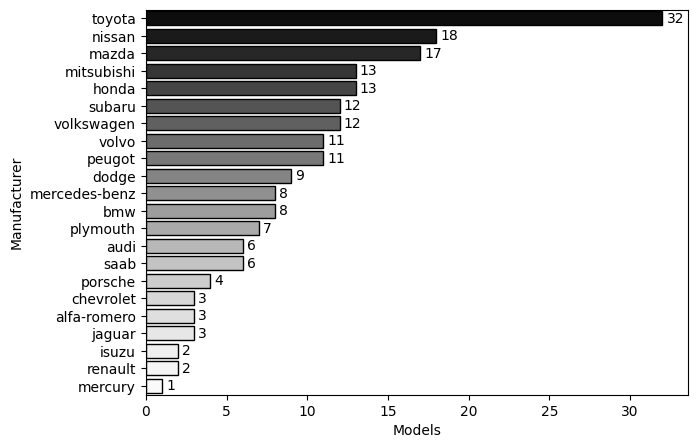

In [ ]:
# Simple count_values() displayed as a barplot
makes = auto_df['make'].value_counts()

# Convert series to dataframe
makes_df = makes.reset_index()
makes_df.columns = ['Manufacturer', 'Models']

# Create barplot
fig = plt.figure(figsize=(7,5))
ax = sns.barplot(
    x='Models', y='Manufacturer', hue='Manufacturer',
    legend=False, data = makes_df,
    palette='Greys_r', edgecolor='black'
)

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container, padding=3)
plt.show()

#### Which are the 5 most expensive cars?

How do the most expensive and cheapest cars compare? Exploring the most expensive cars highlights if some cars are worth the money spent on them based on their fuel economy (mpg or miles per gallon).

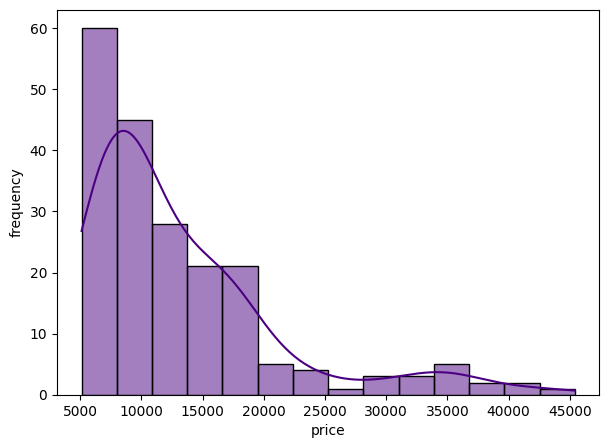

In [32]:
# Histplot of price
fig = plt.figure(figsize=(7,5))
sns.histplot(data=auto_df, x='price', color='indigo', kde=True)

# Add labels
plt.xlabel('price')
plt.ylabel('frequency')

# Show plot
plt.show()

The dataset contains a large range of prices, from 5,000 – 45,000 currency units. The distribution is left-skewed with a small second peak at approximately 35,000 currency units.

To find the five most expensive cars, sort the data:

In [33]:
# Sort the data by price ascending
auto_df.sort_values('price',inplace=True)

# Finding the 5 most expensive cars
expensive = auto_df.iloc[-5:].copy()
expensive['label'] = 'expensive'

In [34]:
# Display the five most expensive cars
print(f"The five most expensive cars are: ")
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(expensive[::-1])

The five most expensive cars are: 


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,label
74,mercedes-benz,gas,std,two,hardtop,rwd,front,112,199,72,55,3715,ohcv,eight,304,mpfi,3,3,8,184,4500,14,16,45400,expensive
16,bmw,gas,std,two,sedan,rwd,front,103,193,67,53,3380,ohc,six,209,mpfi,3,3,8,182,5400,16,22,41315,expensive
73,mercedes-benz,gas,std,four,sedan,rwd,front,120,208,71,56,3900,ohcv,eight,308,mpfi,3,3,8,184,4500,14,16,40960,expensive
128,porsche,gas,std,two,convertible,rwd,rear,89,168,65,51,2800,ohcf,six,194,mpfi,3,2,9,207,5900,17,25,37028,expensive
17,bmw,gas,std,four,sedan,rwd,front,110,197,70,56,3505,ohc,six,209,mpfi,3,3,8,182,5400,15,20,36880,expensive


Among the five most expensive cars, the engines are large, with high horsepower and high peak RPMs, suggesting vehicles with lots of power that will be pleasing to drive for motoring enthusiasts. However, the miles per gallon (MPG) of these cars on the highway is low.

Find the five cheapest cars, and five cars centered on the median price to compare with the most expensive cars:

In [35]:
# Finding the 5 cheapest cars
budget = auto_df.iloc[0:5].copy()
budget['label'] = 'cheap'

In [ ]:
# First find the median index ie the middle row of the sorted dataframe
median_index = int((auto_df.shape[0]+1)/2)
print(
    f"The index of the median priced car is {median_index} "
    f"in the sorted list."
)

The index of the median priced car is 101 in the sorted list.


In [37]:
# Finding the 5 mid_range cars (ie median_index +/-2).
average_price = auto_df.iloc[95:100].copy()
average_price['label'] = 'mid-range'

In [ ]:
# Compare mpg for the least and most expensive cars
# Collect data
data = pd.concat([auto_df.head(1), auto_df.iloc[[97],:], auto_df.tail(1)])

# Reorder columns
data = data[[
    'price', 'make', 'city-mpg', 'highway-mpg', 'fuel-type',
    'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
    'engine-location', 'wheel-base', 'length', 'width', 'height',
    'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
    'fuel-system', 'bore', 'stroke', 'compression-ratio',
    'horsepower', 'peak-rpm'
]]

# Display data
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(data)

,price,make,city-mpg,highway-mpg,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm
138,5118,subaru,31,36,gas,std,two,hatchback,fwd,front,93,156,63,53,2050,ohcf,four,97,2bbl,3,2,9,69,4900
188,9995,volkswagen,26,32,gas,std,four,sedan,fwd,front,97,171,65,55,2300,ohc,four,109,mpfi,3,3,10,100,5500
74,45400,mercedes-benz,14,16,gas,std,two,hardtop,rwd,front,112,199,72,55,3715,ohcv,eight,304,mpfi,3,3,8,184,4500


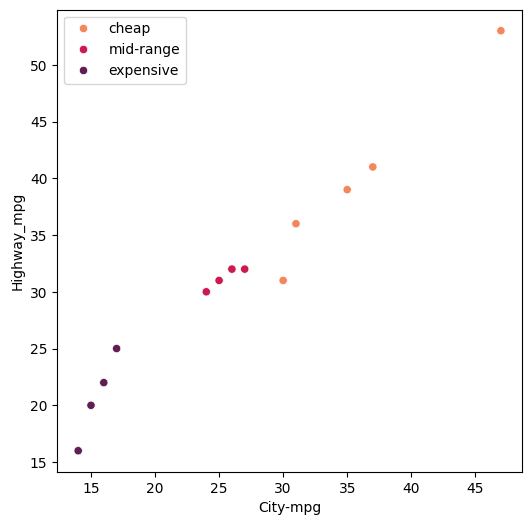

In [ ]:
# Compare the mpg for the three price classes
# Combine data
combined = pd.concat(
    [budget, average_price, expensive],
    axis=0, ignore_index=True
)

# Create scatterplot
fig = plt.figure(figsize=(6,6))
sns.scatterplot(
    data=combined, x='city-mpg', y='highway-mpg',
    hue='label', palette='rocket_r'
)

# Add labels
plt.xlabel('City-mpg')
plt.ylabel('Highway_mpg')
plt.legend()

# Display the plot
plt.show()

The fuel efficiency of the five cheapest cars, five mid-range cars and the five most expensive cars has almost no overlap between the points for each price group.

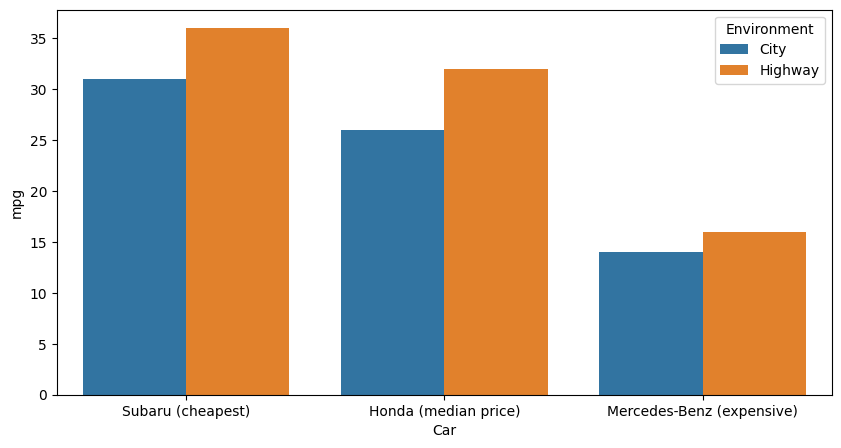

In [ ]:
# Grouped barplot
# List of x values (make and cost category)
x_values = [
    'Subaru (cheapest)', 'Subaru (cheapest)',
    'Honda (median price)', 'Honda (median price)',
    'Mercedes-Benz (expensive)', 'Mercedes-Benz (expensive)'
]
# List of y values for both mpg series for each x_value
y_values = [
    data.iloc[0, 2], data.iloc[0, 3],
    data.iloc[1, 2], data.iloc[1, 3],
    data.iloc[2, 2], data.iloc[2, 3]
]
# List of series labels
series = ['City', 'Highway', 'City', 'Highway', 'City', 'Highway']

# Create dataframe class_df
group_data = pd.DataFrame({
    'Car': x_values,
    'mpg': y_values,
    'Environment': series
})

# Plot grouped bar chart
fig = plt.figure(figsize=(10,5))
sns.barplot(x='Car', y='mpg', hue='Environment', data = group_data)
plt.show()

Similarly, a grouped bar chart showing the fuel efficiency of the cheapest, median and most expensive cars also shows no overlap between the points for each price group, supporting the assertion that the most expensive cars have the lowest fuel efficiency.

Consider the relationship between city-mpg and highway-mpg across the price range:

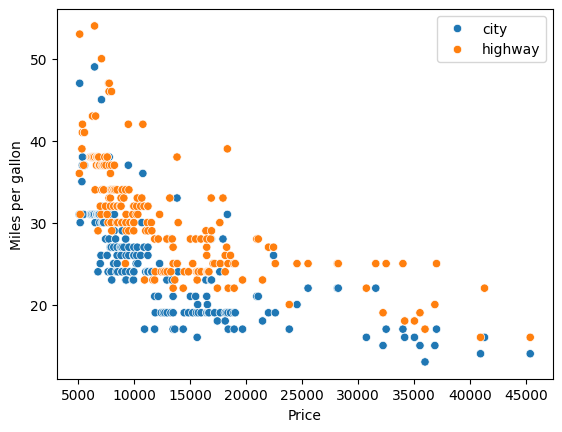

In [41]:
# Scatterplot of city-mpg vs highway-mpg
# https://www.geeksforgeeks.org/data-visualization/visualizing-multiple-datasets-on-the-same-scatter-plot/
# Create dataframes of city-mpg and highway-mpg vs price
city_df = auto_df[['price', 'city-mpg']].copy()
highway_df = auto_df[['price', 'highway-mpg']].copy()

# Add labels
city_df['label'] = 'city'
highway_df['label'] = 'highway'

# Rename columns
city_df.columns = ['price', 'mpg', 'label']
highway_df.columns = ['price', 'mpg', 'label']

# Combine dataframes using concat
mpg_df = pd.concat([city_df, highway_df])

# Scatterplot
sns.scatterplot(data=mpg_df, x='price', y='mpg', hue='label')

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Miles per gallon')
plt.legend()

plt.show()

There is an inverse relationship between fuel efficiency and price. In this dataset, the highest priced cars have the lowest fuel efficiencies and the lowest priced cars have the highest fuel efficiencies. If a prospective buyer prioritizes their budget, both at time of purchase and during their use of the vehicle, above all other considerations, they will choose a lower priced car. 

However, cars are more than a mode of transport for most people: they are visible indicators of status and personal choice. It is clear from the data that the most expensive cars are not optimised for fuel efficiency but for other factors.

The above scatterplot also suggests a direct relationship between city-mpg and highway-mpg, independent of price.

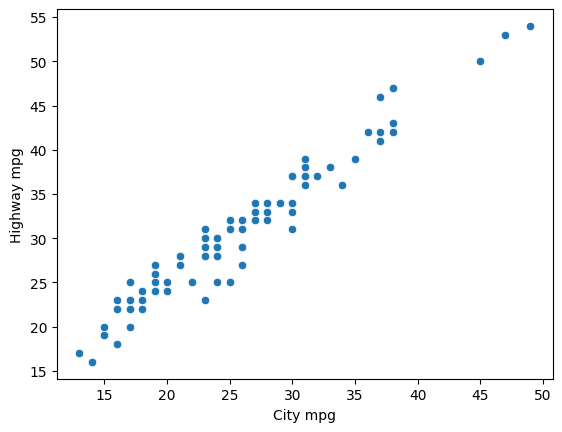

In [42]:
# Scatterplot of city-mpg vs highway-mpg
# https://www.geeksforgeeks.org/data-visualization/visualizing-multiple-datasets-on-the-same-scatter-plot/
# Create dataframes of city-mpg and highway-mpg vs price
city_df = auto_df[['price', 'city-mpg', 'make']].copy()  # 'make' used later
highway_df = auto_df[['price', 'highway-mpg']].copy()

# Add highway-mpg to city_df
mpg_df = city_df.copy()
mpg_df['highway-mpg'] = highway_df['highway-mpg']

# Scatterplot
sns.scatterplot(data=mpg_df, x='city-mpg', y='highway-mpg')

# Add labels and title
plt.xlabel('City mpg')
plt.ylabel('Highway mpg')

plt.show()

There is a strong positive correlation between city-mpg and highway-mpg. Specify the relationship using linear regression.

Regression equation: highway-mpg = 4.7 + 1.0city-mpg
Regression coefficient of correlation r = 1.0


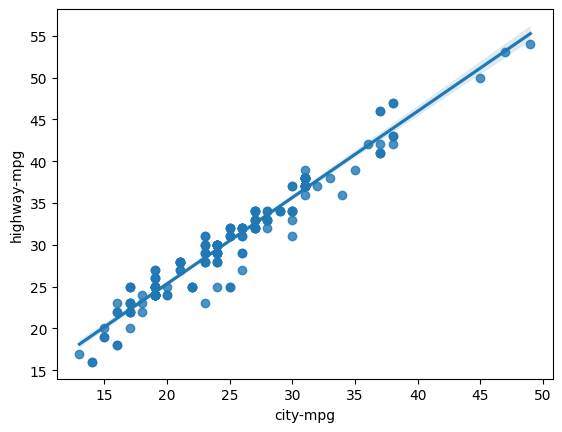

In [ ]:
# Add regression line
# https://stackoverflow.com/questions/60582253/how-can-you-add-a-trendline-to-a-seaborns-lineplot
p = sns.regplot(x="city-mpg", y="highway-mpg", data=auto_df)

# Calculate regression parameters and display the equation of the regression
# line
# https://www.statology.org/seaborn-regplot-equation/
slope, intercept, r, p, sterr = sci.stats.linregress(
    x=p.get_lines()[0].get_xdata(),
    y=p.get_lines()[0].get_ydata()
)
print(
    f"Regression equation: highway-mpg = {round(intercept, 1)} + "
    f"{round(slope, 1)}city-mpg\n"
    f"Regression coefficient of correlation r = {r}"
)

plt.show()

The fit is very good, with r=1.0. With an r-value of 1.0, it is possible the model is overfitted to this dataset, so further testing is needed before applying to other datasets.

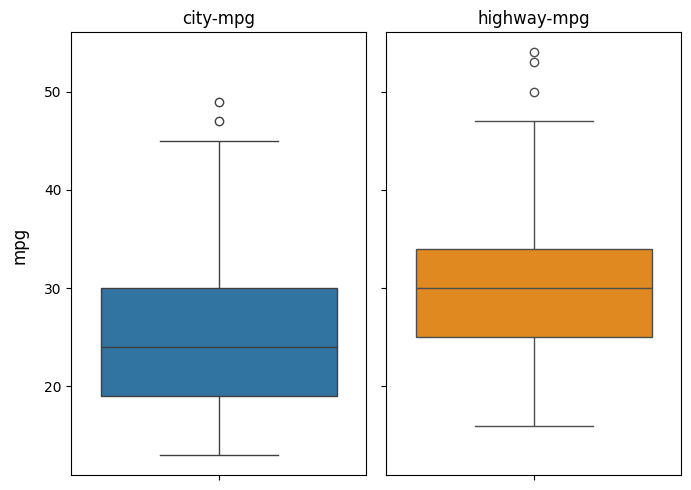

In [44]:
# Boxplot of city-mpg and highway-mpg (all data)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(7,5))
sns.boxplot(data=auto_df, y='city-mpg', ax=ax1)
sns.boxplot(data=auto_df, y='highway-mpg', ax=ax2, color='darkorange')

# Add labels
ax1.set_title('city-mpg')
ax2.set_title('highway-mpg')
ax1.set_ylabel('')
fig.supylabel('mpg')

fig.tight_layout()
plt.show()

#### Which manufacturer builds the most fuel efficient vehicles?

First find the most and least fuel efficient cars.

In [ ]:
# Sort the dataframe by city-mpg (NB result above shows city-mpg +ve corr with highway-mpg)
city_df = auto_df.sort_values('city-mpg', ascending=False).copy()

# Reorder columns
city_df = city_df[[
    'make', 'city-mpg', 'highway-mpg', 'price', 'fuel-type',
    'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
    'engine-location', 'wheel-base', 'length', 'width', 'height',
    'curb-weight', 'engine-type', 'num-of-cylinders',
    'engine-size', 'fuel-system', 'bore', 'stroke',
    'compression-ratio', 'horsepower', 'peak-rpm'
]]

# Display data
print(f"The most fuel efficient car in the data:")
with pd.option_context("display.max_rows", 1, "display.max_columns", None):
    display(city_df[0:])

print(f"\nThe least fuel efficient car in the data:")
with pd.option_context("display.max_rows", 1, "display.max_columns", None):
    display(city_df[-1:])

The most fuel efficient car in the data:


,make,city-mpg,highway-mpg,price,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm
30,honda,49,54,6479,gas,std,two,hatchback,fwd,front,86,144,63,50,1713,ohc,four,92,1bbl,2,3,9,58,4800



The least fuel efficient car in the data:


,make,city-mpg,highway-mpg,price,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm
49,jaguar,13,17,36000,gas,std,two,sedan,rwd,front,102,191,70,47,3950,ohcv,twelve,326,mpfi,3,2,11,262,5000


The most fuel-efficient car in the dataset is a Honda and the least fuel efficient is a Jaguar. The Jaguar is over five times more expensive than the Honda, consistent with the findings above that the more expensive a car is, the less fuel efficient it is.

Now consider the mean fuel efficiency for each manufacturer.

In [46]:
# Prepare dataframes
# Average city-mpg for each maker
make_city = city_df.groupby('make')['city-mpg'].mean()

# Average highway-mpg for each maker
make_highway = city_df.groupby('make')['highway-mpg'].mean()

# Convert series to dataframes
make_city_df = make_city.reset_index()
make_city_df.columns = ['make', 'city-mpg']
make_hw_df = make_highway.reset_index()
make_hw_df.columns = ['make', 'highway-mpg']

# Sort dataframes
make_city_df.sort_values('city-mpg', ascending=False, inplace=True)
make_hw_df.sort_values('highway-mpg', ascending=False, inplace=True)

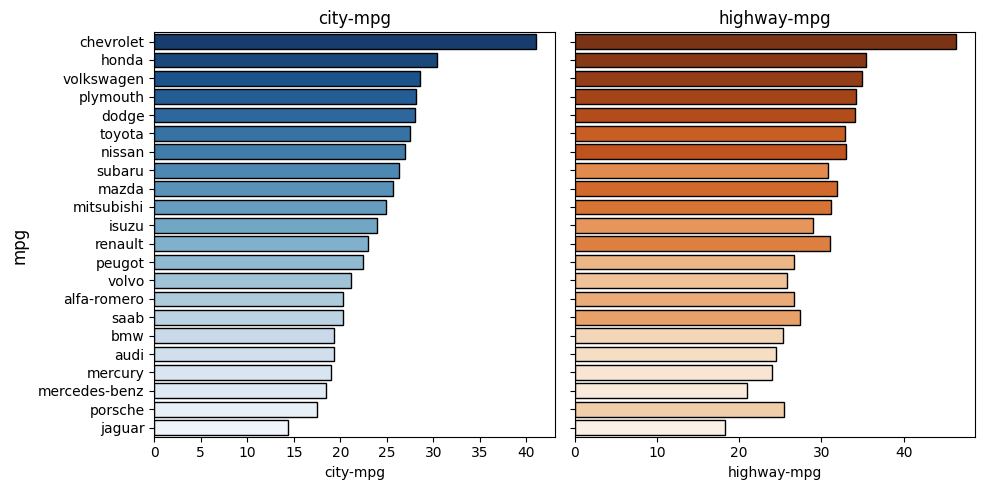

In [ ]:
# Barplots of city-mpg and highway-mpg vs cost
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
sns.barplot(
    data=make_city_df, y='make', x='city-mpg', hue='make',
    palette='Blues_r', legend=False, edgecolor='black', ax=ax1
)
sns.barplot(
    data=make_hw_df, y='make', x='highway-mpg', hue='make',
    palette='Oranges_r', legend=False, edgecolor='black', ax=ax2
)

# Add labels
ax1.set_title('city-mpg')
ax2.set_title('highway-mpg')
ax1.set_ylabel('')
fig.supylabel('mpg')

fig.tight_layout()
plt.show()

The manufacturer with the most fuel efficient range of vehicles is Chevrolet, and it is clearly ahead of second-placed Honda. However, there are only three datapoints for Chevrolet, while there are 13 for Honda (results above) and the mean value is strongly influenced by outliers. More Chevrolet datapoints are required to support the assertion that Chevrolet produces the most fuel efficient cars in general, outside this dataset.  

The positions for each manufacturer are broadly consistent in both environments, however in the middle-order of this ranking there is some movement of 2-3 positions. The most notable shift is Porsche, which has the second lowest city MPG but the tenth lowest highway MPG. If a consumer is prioritising fuel efficiency when considering their car, they would be well-advised to consider a Chevrolet or Honda model.

Consider fuel efficiency and fuel type.

In [48]:
# Numbers of gas and diesel cars in the dataset
print(auto_df['fuel-type'].value_counts())

fuel-type
gas       181
diesel     20
Name: count, dtype: int64


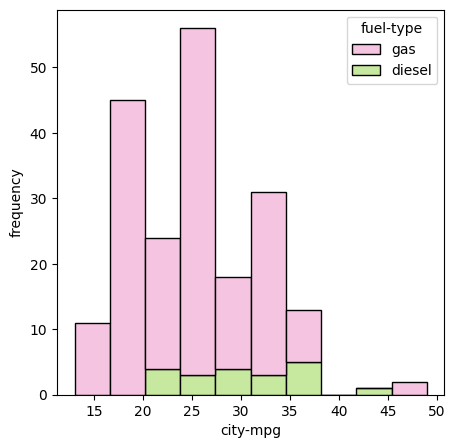

In [ ]:
# Histplot of city-mpg by fuel type
fig = plt.figure(figsize=(5,5))
sns.histplot(
    data=city_df, x='city-mpg', hue='fuel-type',
    palette='PiYG', multiple='stack', alpha=1
)

# Add labels
plt.xlabel('city-mpg')
plt.ylabel('frequency')

# Show plot
plt.show()

Among the general European public diesel cars are perceived to be more fuel efficient than gas (petrol) cars. In this dataset, only 20 cars are fuelled by diesel, however even with this restricted amount of data, city fuel efficiency appears to be generally higher for diesel cars. 

#### Which vehicles have the largest engine capacity.
Sort the dataframe based on the engine-size column.

In [ ]:
# Sort the dataframe by engine-size
engine = auto_df.sort_values('engine-size', ascending=False).copy()

# Reorder columns
# cols = list(engine.columns.values)
# print(cols)
engine = engine[[
    'make', 'engine-size','fuel-type', 'aspiration', 'num-of-doors',
    'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
    'length', 'width', 'height', 'curb-weight', 'engine-type',
    'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
    'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'
]]

Display the car with the largest engine in the dataset.

In [51]:
# Display data
with pd.option_context("display.max_rows", 1, "display.max_columns", None):
    display(engine)

,make,engine-size,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,jaguar,326,gas,std,two,sedan,rwd,front,102,191,70,47,3950,ohcv,twelve,mpfi,3,2,11,262,5000,13,17,36000


Consider the relationship between body style and engine size.

<Figure size 640x480 with 0 Axes>

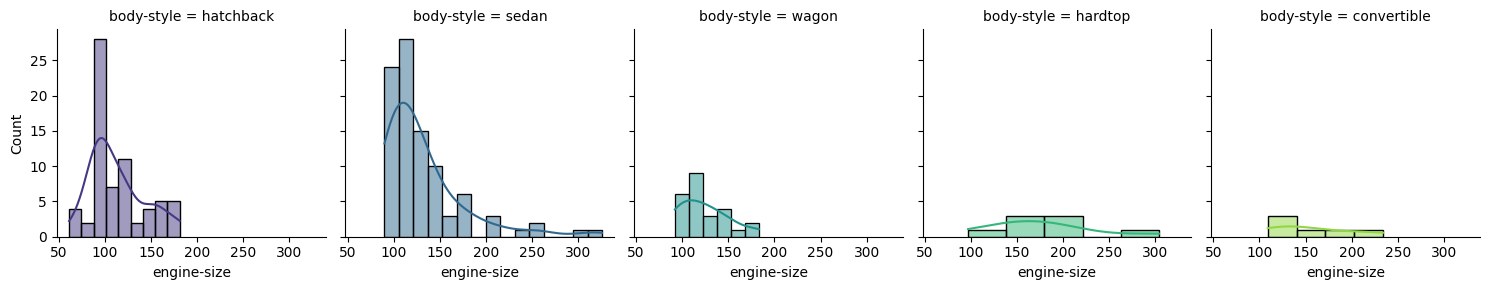

In [ ]:
# Facet grid of engine size histogram for the body-style
plt.figure()
fg = sns.FacetGrid(
    auto_df, col = "body-style", hue = "body-style",
    margin_titles = True, palette='viridis'
)
fg.map(sns.histplot, "engine-size", kde=True)
plt.show()

The largest engines are in sedan cars and the smallest in hatchbacks. In this dataset, the size of engines in wagons appears relatively small, given that wagons are typically larger vehicles for transporting more passengers or cargo. Therefore, these wagons may be considered underpowered. Alternatively, if the wagons have an appropriate engine size for their physical size and weight, it highlights the overpowered nature of the sedans with the largest engine sizes.

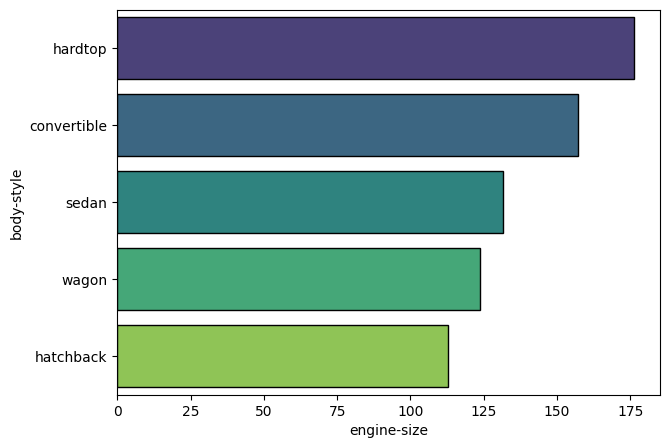

In [ ]:
# Average engine size for each body-style
engine_body = engine.groupby('body-style')['engine-size'].mean()

# Convert series to dataframe
engine_body_df = engine_body.reset_index()
engine_body_df.columns = ['body-style', 'engine-size']

# Sort dataframe
engine_body_df.sort_values('engine-size', ascending=False, inplace=True)

# Create barplot
fig = plt.figure(figsize=(7,5))
sns.barplot(
    data=engine_body_df, y='body-style', x='engine-size',
    hue='body-style', palette='viridis', legend=False, edgecolor='black'
)

# Add labels and title
plt.ylabel('body-style')
plt.xlabel('engine-size')

plt.show()

The mean engine size by body style shows a different trend, with the largest mean engine size being hardtop and convertible sports cars. 

Consider the average engine size for each manufacturer.

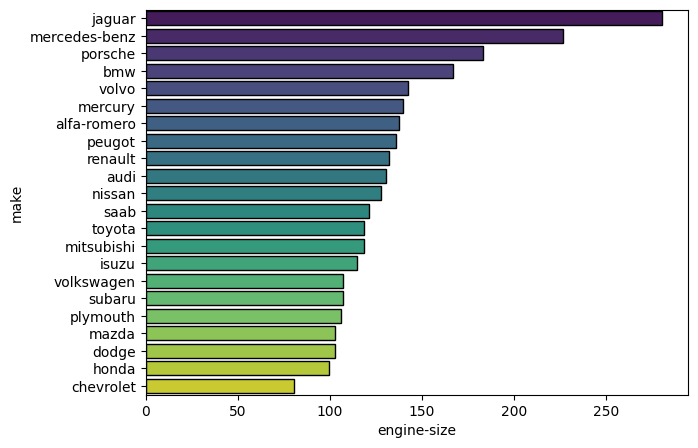

In [ ]:
# Average engine size for each maker
engine_make = engine.groupby('make')['engine-size'].mean()

# Convert series to dataframe
engine_make_df = engine_make.reset_index()
engine_make_df.columns = ['make', 'engine-size']

# Sort dataframe
engine_make_df.sort_values('engine-size', ascending=False, inplace=True)

# Create barplot
fig = plt.figure(figsize=(7,5))
sns.barplot(
    data=engine_make_df, y='make', x='engine-size',
    hue='make', palette='viridis', legend=False, edgecolor='black'
)

# Add labels and title
plt.ylabel('make')
plt.xlabel('engine-size')

plt.show()

The mean engine size by manufacturer has almost exactly the reverse ranking of fuel efficiency by manufacturer.

Before searching for correlations between numerical data and engine size, the data needs to be prepared and as many related variables as possible eliminated. I consider curb-weight, length and width to be proxies for the size of the car, that I will eliminate in favour of preserving wheel-base and height. We have already established a relationship between city-mpg and highway-mpg and I choose to eliminate highway-mpg.

In [55]:
# Remove related columns
cols_to_drop = ['curb-weight', 'length', 'width', 'city-mpg']
corr_df = auto_df.drop(columns=cols_to_drop)

Create correlation heatmap for the remaining numerical variables.

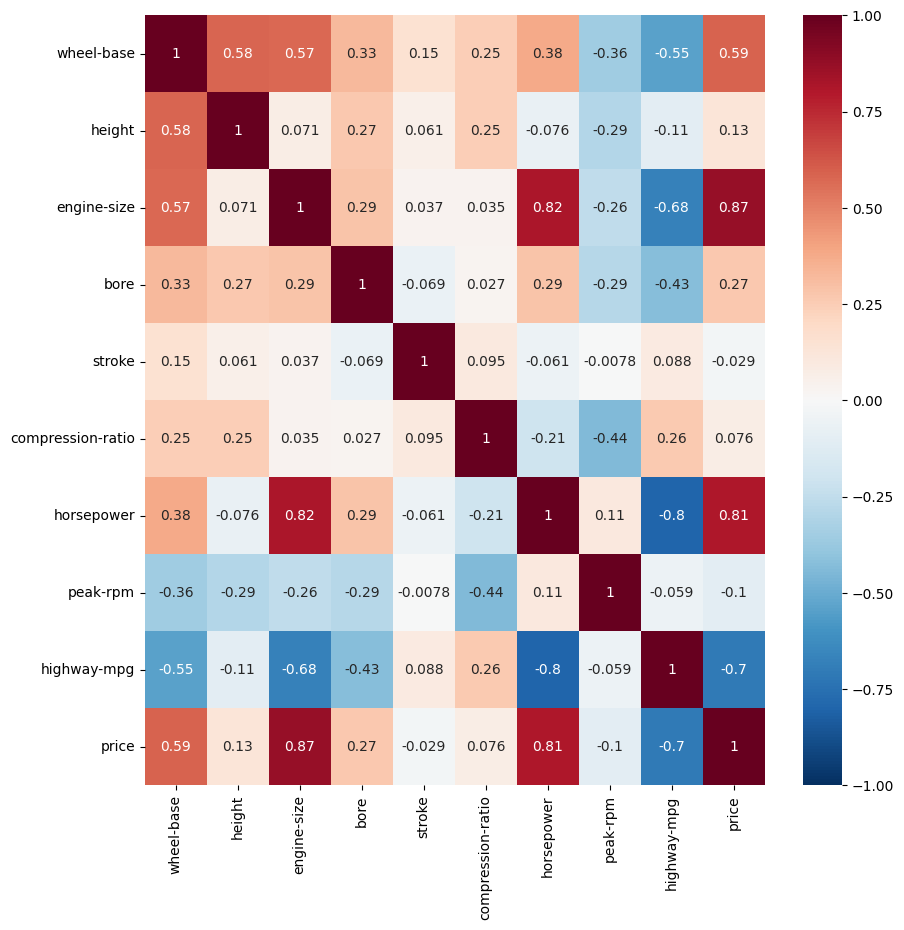

In [56]:
# Correlation matrix for the numeric values
corr = corr_df.corr(numeric_only=True)

# Plot the heatmap
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="RdBu_r", annot=True, vmin=-1, vmax=1)
plt.show()

The heatmap shows pale colors on the engine size row, indicating weak or null relationships, for height, stroke, bore, compression-ratio and peak-rpm. Remove these columns.

In [57]:
# Remove other columns
cols_to_drop = ['height', 'stroke', 'bore', 'compression-ratio', 'peak-rpm']
multi_df = corr_df.drop(columns=cols_to_drop)

Investigate the remaining relationships with engine size in more detail, looking at scatter and kde plots of each pair of variables and the histograms for each variable. 

<Figure size 1000x1000 with 0 Axes>

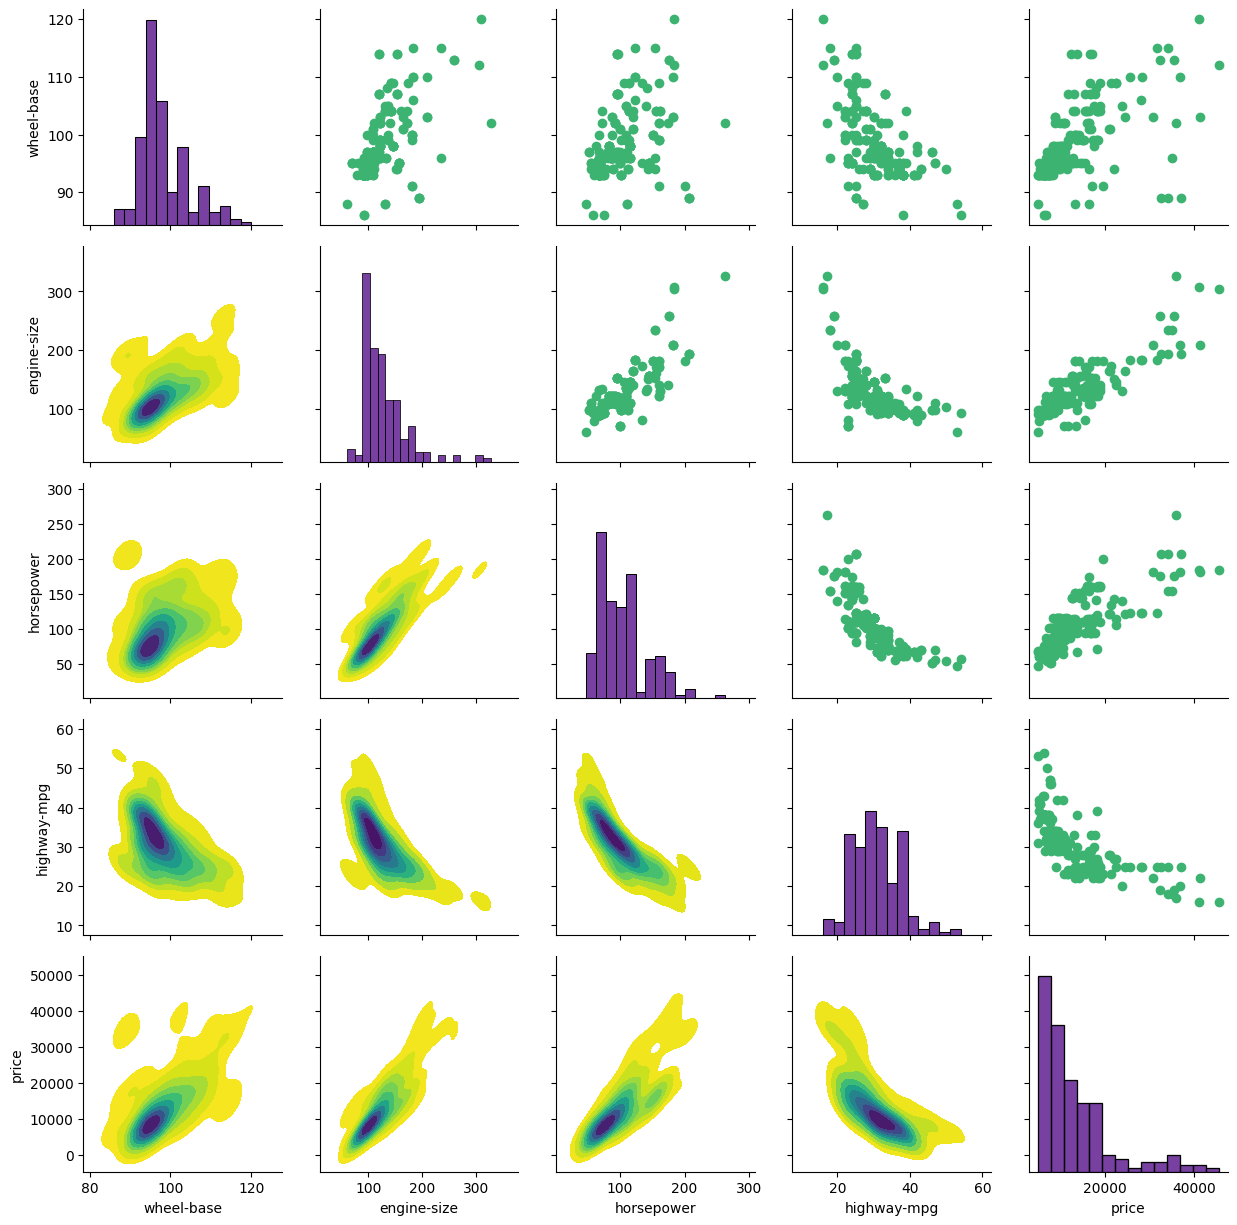

In [58]:
# Create multigrid
fig=plt.figure(figsize=(10,10))
g = sns.PairGrid(multi_df)
g.map_upper(plt.scatter, color = "mediumseagreen")
g.map_lower(sns.kdeplot, cmap = "viridis_r", fill=True)
g.map_diag(sns.histplot, color = "indigo")
plt.show()

All the KDE plots show high probability density in the bottom left corner of the plots, consistent with the left skew in engine size, horsepower and price distributions. With the possible exception of fuel efficiency-price KDE plot, all of them contain a single mode. In the case of fuel efficiency-price there is a hint of a second mode of high price vehicles: these potentially represent luxury cars.

The strongest, clearest relationships are between price and horsepower and engine-size. The KDE plots show a narrowly defined and positively correlated probability density function. It is clear that as engine size increases, horsepower and price also increase.

The inverse relationship between fuel efficiency and engine size identified previously, is also visible here.

The relationship between engine size and wheel base is the weakest shown. The contours of the KDE plot show a weakly positive correlation.

Overall these distributions follow the expected trends from previous analysis.